In [60]:
import numpy as np # linear algebra
import pandas as pd # data processing, CSV file I/O (e.g. pd.read_csv)
#import tensorflow as tf
import matplotlib.pyplot as plt
import seaborn as sns
from sklearn.manifold import TSNE
from sklearn.decomposition import PCA, TruncatedSVD
import matplotlib.patches as mpatches
import time

# Classifier Libraries
from sklearn.linear_model import LogisticRegression
from sklearn.svm import SVC
from sklearn.neighbors import KNeighborsClassifier
from sklearn.tree import DecisionTreeClassifier
from sklearn.ensemble import RandomForestClassifier
import collections


# Other Libraries
from sklearn.model_selection import train_test_split
from sklearn.pipeline import make_pipeline
from imblearn.pipeline import make_pipeline as imbalanced_make_pipeline
from imblearn.over_sampling import SMOTE
from imblearn.under_sampling import NearMiss
from imblearn.metrics import classification_report_imbalanced
from sklearn.metrics import precision_score, recall_score, f1_score, roc_auc_score, accuracy_score, classification_report
from collections import Counter
from sklearn.model_selection import KFold, StratifiedKFold
import warnings
from sklearn.naive_bayes import GaussianNB
from sklearn.linear_model import LogisticRegression
warnings.filterwarnings("ignore")


In [63]:
fraud_transactions = pd.read_csv('./datasets/creditcard-modified.csv',index_col=0)
fraud_transactions.head(10)

,Time,V1,V2,V3,V4,V5,V6,V7,V8,V9,...,V21,V22,V23,V24,V25,V26,V27,V28,Amount,Class
91771,63621.0,-0.960137,1.206609,2.026405,-0.628816,0.201602,-0.898113,1.100185,-0.354583,-0.225842,...,-0.271188,-0.705533,-0.212958,0.364038,0.234168,-0.027049,-0.208287,-0.102126,2.69,0
205605,135832.0,2.031877,-0.097557,-1.209013,0.435114,-0.009684,-1.092250,0.281522,-0.371851,0.504616,...,-0.239962,-0.534819,0.240245,-0.078971,-0.162834,0.279192,-0.073682,-0.059863,24.01,0
246685,153282.0,2.051962,0.628752,-2.342524,1.437871,1.164495,-0.873292,0.734087,-0.386544,-0.031124,...,-0.038181,0.167084,-0.012515,0.508870,0.535805,-0.517944,0.007064,-0.022177,1.00,0
212610,138926.0,0.089688,0.264593,-0.328242,-2.416836,0.537514,-0.950072,0.676234,-0.272587,-1.151421,...,0.544267,1.640856,-0.123822,0.646009,-0.629648,-0.234901,0.455501,0.311445,15.00,0
82999,59646.0,1.274163,0.414063,-0.033853,0.920460,0.266021,-0.450671,0.335275,-0.280055,-0.213540,...,0.001111,0.101484,-0.236981,-0.409455,0.849685,-0.283042,0.020660,0.018032,20.00,0
27890,34754.0,1.391007,-1.469809,1.168768,-1.134833,-2.088535,0.077296,-1.733541,0.245543,-0.810584,...,-0.226671,-0.138953,0.106559,0.034314,0.121243,-0.161810,0.084089,0.027576,22.00,0
209075,137403.0,2.151015,-0.070477,-2.571981,-0.338708,1.002019,-0.596894,0.500956,-0.201453,0.256297,...,0.125406,0.366472,-0.085471,-0.105760,0.458337,0.247256,-0.103831,-0.094871,0.75,0
150566,93675.0,-1.087730,1.549232,0.165606,-0.979235,1.204379,0.902956,-0.467572,-2.592983,0.683055,...,-1.513069,-0.040886,-0.240288,-0.343415,0.806495,0.019315,-0.250360,-0.019673,13.00,0
246383,153152.0,1.841520,-0.753772,0.040719,0.995352,-1.228052,0.053056,-1.177330,0.253539,2.366046,...,-0.187204,-0.077837,0.207633,-0.070350,-0.440856,0.571945,0.030094,-0.008738,41.87,0
140447,83729.0,-0.126631,-0.183058,-2.490716,-2.302333,0.197675,3.040177,-2.378229,1.996806,-2.384884,...,-0.011055,-0.188586,0.489661,0.966362,-0.770721,-0.331808,-0.596116,-0.390682,10.00,0


In [64]:
fraud_transactions.shape

(60000, 31)

Time variable
213474    38.686111
49951     12.299444
167663    33.007222
51076     12.439167
133482    22.335278
Name: Time_Hr, dtype: float64


Text(0, 0.5, '# transactions')

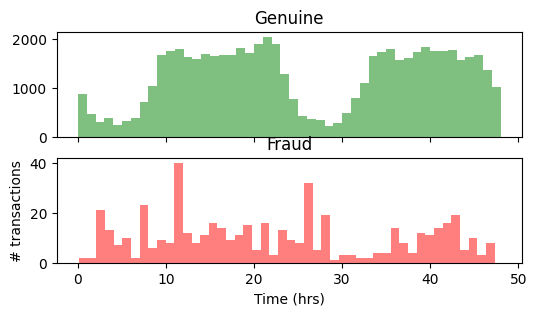

In [65]:
#plot Time to see if there is any trend
print("Time variable")
fraud_transactions["Time_Hr"] = fraud_transactions["Time"]/3600 # convert to hours
print(fraud_transactions["Time_Hr"].tail(5))
fig, (ax1, ax2) = plt.subplots(2, 1, sharex = True, figsize=(6,3))
ax1.hist(fraud_transactions.Time_Hr[fraud_transactions.Class==0],bins=48,color='g',alpha=0.5)
ax1.set_title('Genuine')
ax2.hist(fraud_transactions.Time_Hr[fraud_transactions.Class==1],bins=48,color='r',alpha=0.5)
ax2.set_title('Fraud')
plt.xlabel('Time (hrs)')
plt.ylabel('# transactions')

In [66]:
from sklearn.preprocessing import StandardScaler
fraud_transactions = fraud_transactions.drop(['Time'],axis=1)
fraud_transactions['Amount_Scaled'] = StandardScaler().fit_transform(fraud_transactions['Amount'].values.reshape(-1,1))
fraud_transactions = fraud_transactions.drop(['Amount'],axis=1)
fraud_transactions.head()

,V1,V2,V3,V4,V5,V6,V7,V8,V9,V10,...,V22,V23,V24,V25,V26,V27,V28,Class,Time_Hr,Amount_Scaled
91771,-0.960137,1.206609,2.026405,-0.628816,0.201602,-0.898113,1.100185,-0.354583,-0.225842,-0.222244,...,-0.705533,-0.212958,0.364038,0.234168,-0.027049,-0.208287,-0.102126,0,17.672500,-0.348905
205605,2.031877,-0.097557,-1.209013,0.435114,-0.009684,-1.092250,0.281522,-0.371851,0.504616,0.031857,...,-0.534819,0.240245,-0.078971,-0.162834,0.279192,-0.073682,-0.059863,0,37.731111,-0.262528
246685,2.051962,0.628752,-2.342524,1.437871,1.164495,-0.873292,0.734087,-0.386544,-0.031124,-0.390117,...,0.167084,-0.012515,0.508870,0.535805,-0.517944,0.007064,-0.022177,0,42.578333,-0.355752
212610,0.089688,0.264593,-0.328242,-2.416836,0.537514,-0.950072,0.676234,-0.272587,-1.151421,0.243279,...,1.640856,-0.123822,0.646009,-0.629648,-0.234901,0.455501,0.311445,0,38.590556,-0.299032
82999,1.274163,0.414063,-0.033853,0.920460,0.266021,-0.450671,0.335275,-0.280055,-0.213540,-0.039789,...,0.101484,-0.236981,-0.409455,0.849685,-0.283042,0.020660,0.018032,0,16.568333,-0.278774


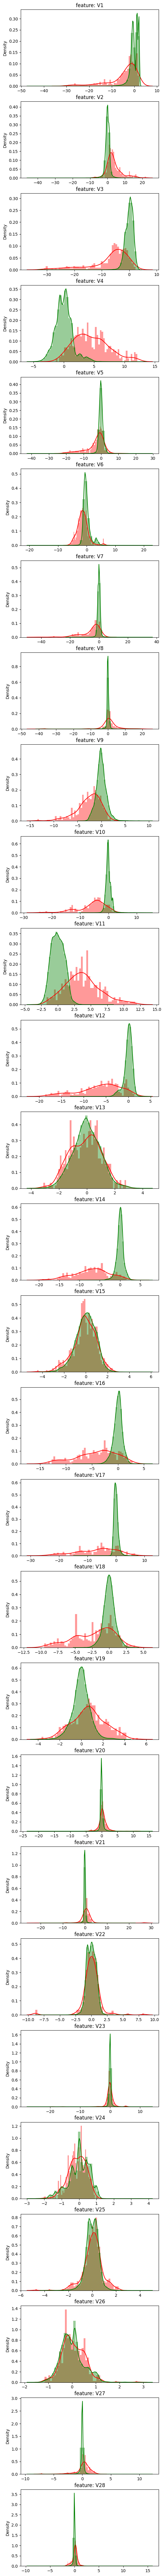

In [67]:
import seaborn as sns
import matplotlib.gridspec as gridspec
gs = gridspec.GridSpec(28, 1)
plt.figure(figsize=(6,28*4))
for i, col in enumerate(fraud_transactions[fraud_transactions.iloc[:,0:28].columns]):
    ax5 = plt.subplot(gs[i])
    sns.distplot(fraud_transactions[col][fraud_transactions.Class == 1], bins=50, color='r')
    sns.distplot(fraud_transactions[col][fraud_transactions.Class == 0], bins=50, color='g')
    ax5.set_xlabel('')
    ax5.set_title('feature: ' + str(col))
plt.show()

In [68]:
import plotly.express as px
labels=["Genuine","Fraud"]

fraud_or_not = fraud_transactions["Class"].value_counts().tolist()
values = [fraud_or_not[0], fraud_or_not[1]]

fig = px.pie(values=fraud_transactions['Class'].value_counts(), names=labels , width=700, height=400, color_discrete_sequence=["skyblue","black"]
             ,title="Fraud vs Genuine transactions")
fig.show()

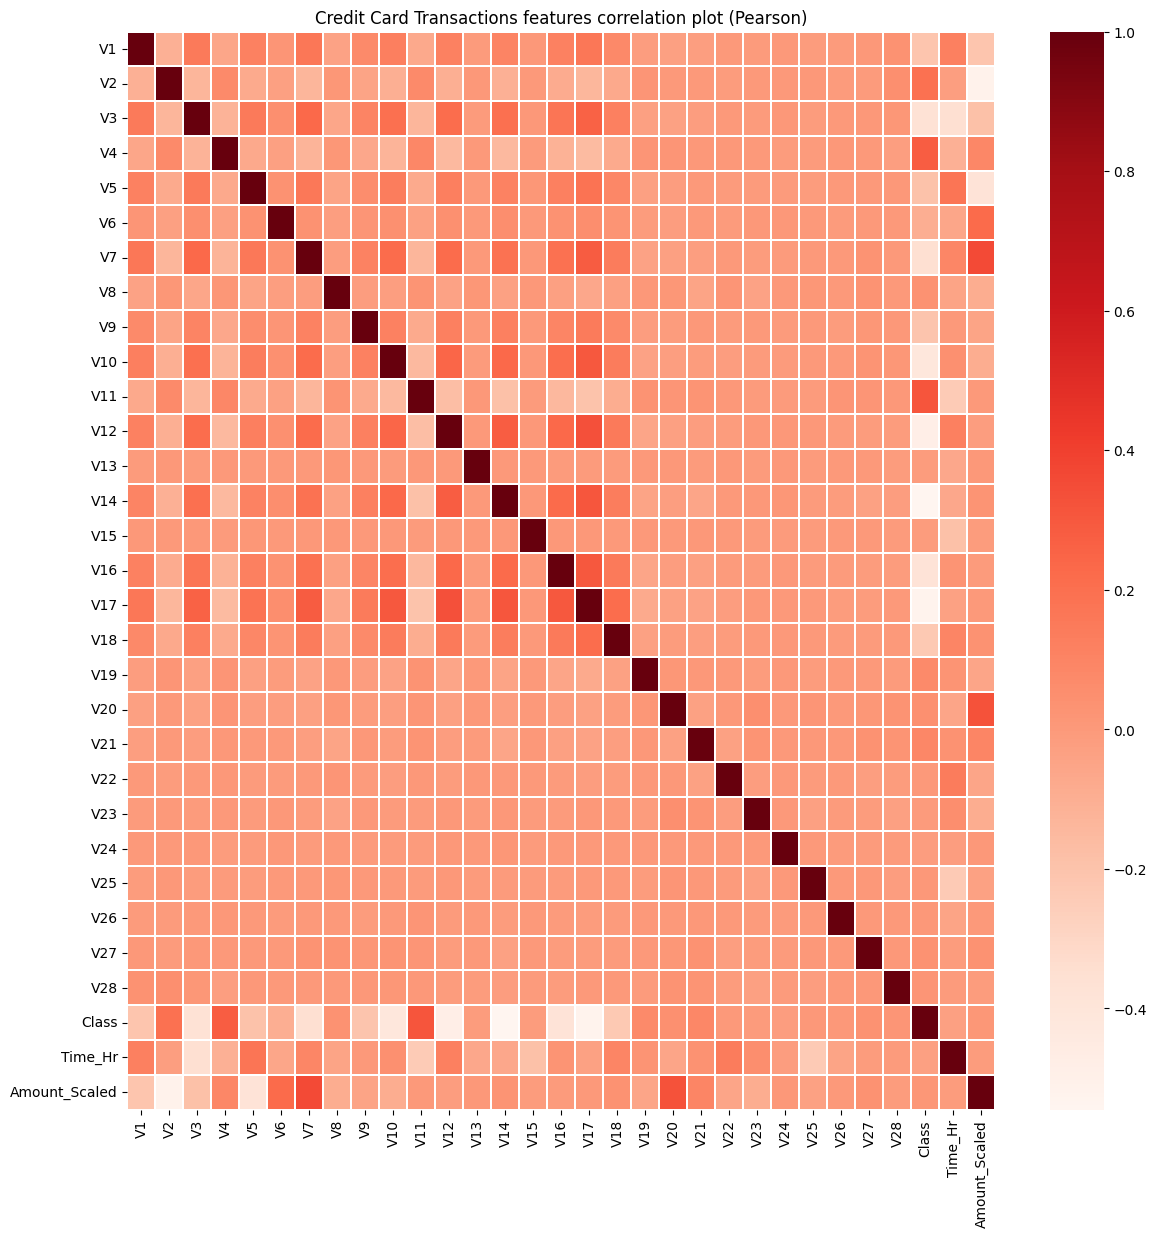

In [69]:
plt.figure(figsize = (14,14))
plt.title('Credit Card Transactions features correlation plot (Pearson)')
corr = fraud_transactions.corr()
sns.heatmap(corr,xticklabels=corr.columns,yticklabels=corr.columns,linewidths=.1,cmap="Reds")
plt.show()

In [70]:
X = fraud_transactions.drop('Class', axis=1)
y = fraud_transactions['Class']

In [72]:
from sklearn.model_selection import train_test_split
X_train, X_test, y_train, y_test = train_test_split(X, y, stratify=y, test_size = 0.3, random_state = 42)

In [73]:
y_train.value_counts()

0    41656
1      344
Name: Class, dtype: int64

In [74]:
y_test.value_counts()

0    17852
1      148
Name: Class, dtype: int64

In [75]:
X_test.head()

,V1,V2,V3,V4,V5,V6,V7,V8,V9,V10,...,V21,V22,V23,V24,V25,V26,V27,V28,Time_Hr,Amount_Scaled
104772,-1.205869,0.358476,0.941843,-1.283479,-0.691672,-1.064738,0.433261,-0.464115,-0.884868,0.997131,...,-0.204913,-0.867589,0.322618,0.314084,-0.274638,-0.754106,-0.934648,0.188482,19.228611,-0.193693
206818,1.794759,-0.165381,-1.714265,0.584960,0.036922,-1.271314,0.385374,-0.402575,0.793853,-0.990136,...,-0.166805,-0.407017,0.065720,-0.036951,-0.060594,-0.108318,-0.017697,0.005410,37.885278,0.152466
272985,2.070787,-0.226940,-1.528827,0.052052,0.392247,-0.198030,-0.003233,-0.045828,0.483416,0.256544,...,-0.308175,-0.837945,0.202859,-1.180607,-0.230090,0.253149,-0.079941,-0.082131,45.933056,-0.319330
193621,-2.588604,-0.326426,1.068028,3.657966,2.557784,0.614117,0.495115,-0.038830,-1.521187,1.186671,...,-0.265302,0.374919,0.518917,-0.040110,1.222879,0.465642,0.039979,-0.021340,36.170833,-0.316899
48559,0.398713,1.724824,-3.794925,0.528056,3.163993,2.335216,0.005451,1.110668,-0.572590,-1.240971,...,-0.141771,-0.485937,0.123842,0.653565,-0.286417,-0.395778,-0.001024,-0.058018,12.137222,-0.352552


In [76]:
from sklearn.model_selection import StratifiedKFold
from sklearn.ensemble import RandomForestClassifier

#We are going to ensure that we have the same splits of the data every time. 
#We can ensure this by creating a KFold object, kf, and passing cv=kf instead of the more common cv=5.

kf = StratifiedKFold(n_splits=5, shuffle=False)
rf = RandomForestClassifier(n_estimators=100, random_state=13)
#cross_val_score(rf, X_train, y_train, cv=kf, scoring='recall')

In [77]:
from sklearn.model_selection import cross_val_score
score = cross_val_score(rf, X_train, y_train, cv=kf, scoring='recall')
print("Cross Validation Recall scores are: {}".format(score))
print("Average Cross Validation Recall score: {}".format(score.mean()))


Cross Validation Recall scores are: [0.88235294 0.79710145 0.85507246 0.7826087  0.82608696]
Average Cross Validation Recall score: 0.8286445012787723


In [78]:
from sklearn.model_selection import GridSearchCV

params = {
    'n_estimators': [50, 100, 200],
    'max_depth': [4, 6, 10, 12],
    'random_state': [13]
}

grid_rf = GridSearchCV(rf, param_grid=params, cv=kf, 
                          scoring='recall').fit(X_train, y_train)

In [79]:
print('Best parameters:', grid_rf.best_params_)
print('Best score:', grid_rf.best_score_)

Best parameters: {'max_depth': 12, 'n_estimators': 200, 'random_state': 13}
Best score: 0.8344842284739983


In [80]:
y_pred = grid_rf.predict(X_test)

In [81]:
from sklearn.metrics import confusion_matrix, recall_score, precision_score, f1_score, accuracy_score
cm = confusion_matrix(y_test, y_pred)

rf_Recall = recall_score(y_test, y_pred)
rf_Precision = precision_score(y_test, y_pred)
rf_f1 = f1_score(y_test, y_pred)
rf_accuracy = accuracy_score(y_test, y_pred)

print(cm)

[[17850     2]
 [   29   119]]


In [82]:
ndf = [(rf_Recall, rf_Precision, rf_f1, rf_accuracy)]

rf_score = pd.DataFrame(data = ndf, columns=['Recall','Precision','F1 Score', 'Accuracy'])
rf_score.insert(0, 'Random Forest with', 'No Under/Oversampling')
rf_score

,Random Forest with,Recall,Precision,F1 Score,Accuracy
0,No Under/Oversampling,0.804054,0.983471,0.884758,0.998278


In [83]:
fraud_transactions['Class'].value_counts()

0    59508
1      492
Name: Class, dtype: int64

In [84]:
df = fraud_transactions.sample(frac=1)

# amount of fraud classes 492 rows.
fraud_df = df.loc[df['Class'] == 1]
non_fraud_df = df.loc[df['Class'] == 0][:492]

normal_distributed_df = pd.concat([fraud_df, non_fraud_df])

# Shuffle dataframe rows
new_df = normal_distributed_df.sample(frac=1, random_state=42)

new_df.head()

,V1,V2,V3,V4,V5,V6,V7,V8,V9,V10,...,V22,V23,V24,V25,V26,V27,V28,Class,Time_Hr,Amount_Scaled
239632,-0.905584,0.913258,0.355667,0.601319,0.544213,-0.285219,0.186124,0.218994,-0.908881,-0.333759,...,0.818826,-0.570864,0.591302,0.680329,0.774807,-0.186538,-0.018573,0,41.721111,-0.339587
11841,-15.271362,8.326581,-22.338591,11.885313,-8.721334,-2.324307,-16.196419,0.512882,-6.333685,-13.175198,...,1.068019,1.085617,-1.039797,-0.182006,0.649921,2.149247,-1.406811,1,5.647778,-0.355752
90118,0.041327,-2.919733,0.470245,-0.060742,-1.824044,1.131552,-0.604765,0.345343,-0.132307,0.193894,...,0.170235,-0.473210,-0.239475,-0.032985,-0.265158,-0.034003,0.112596,0,17.463889,2.131698
30496,-4.844372,5.649439,-6.730396,5.252842,-4.409566,-1.740767,-6.311699,3.449167,-5.416284,-7.833556,...,-0.845753,0.190674,-0.216443,-0.325033,-0.270328,0.210214,0.391855,1,9.986944,0.092747
47802,-3.365319,2.426503,-3.752227,0.276017,-2.305870,-1.961578,-3.029283,-1.674462,0.183961,-4.980928,...,-0.512626,-0.248502,0.126550,0.104166,-1.055997,-1.200165,-1.012066,1,12.046944,-0.003273


In [85]:
new_df.shape

(984, 31)

In [86]:
# New_df is from the random undersample data (fewer instances)
X = new_df.drop('Class', axis=1)
y = new_df['Class']


# T-SNE Implementation
t0 = time.time()
X_reduced_tsne = TSNE(n_components=2, random_state=42).fit_transform(X.values)
t1 = time.time()
print("T-SNE took {:.2} s".format(t1 - t0))

# PCA Implementation
t0 = time.time()
X_reduced_pca = PCA(n_components=2, random_state=42).fit_transform(X.values)
t1 = time.time()
print("PCA took {:.2} s".format(t1 - t0))

# TruncatedSVD
t0 = time.time()
X_reduced_svd = TruncatedSVD(n_components=2, algorithm='randomized', random_state=42).fit_transform(X.values)
t1 = time.time()
print("Truncated SVD took {:.2} s".format(t1 - t0))

T-SNE took 2.1 s
PCA took 0.063 s
Truncated SVD took 0.0032 s


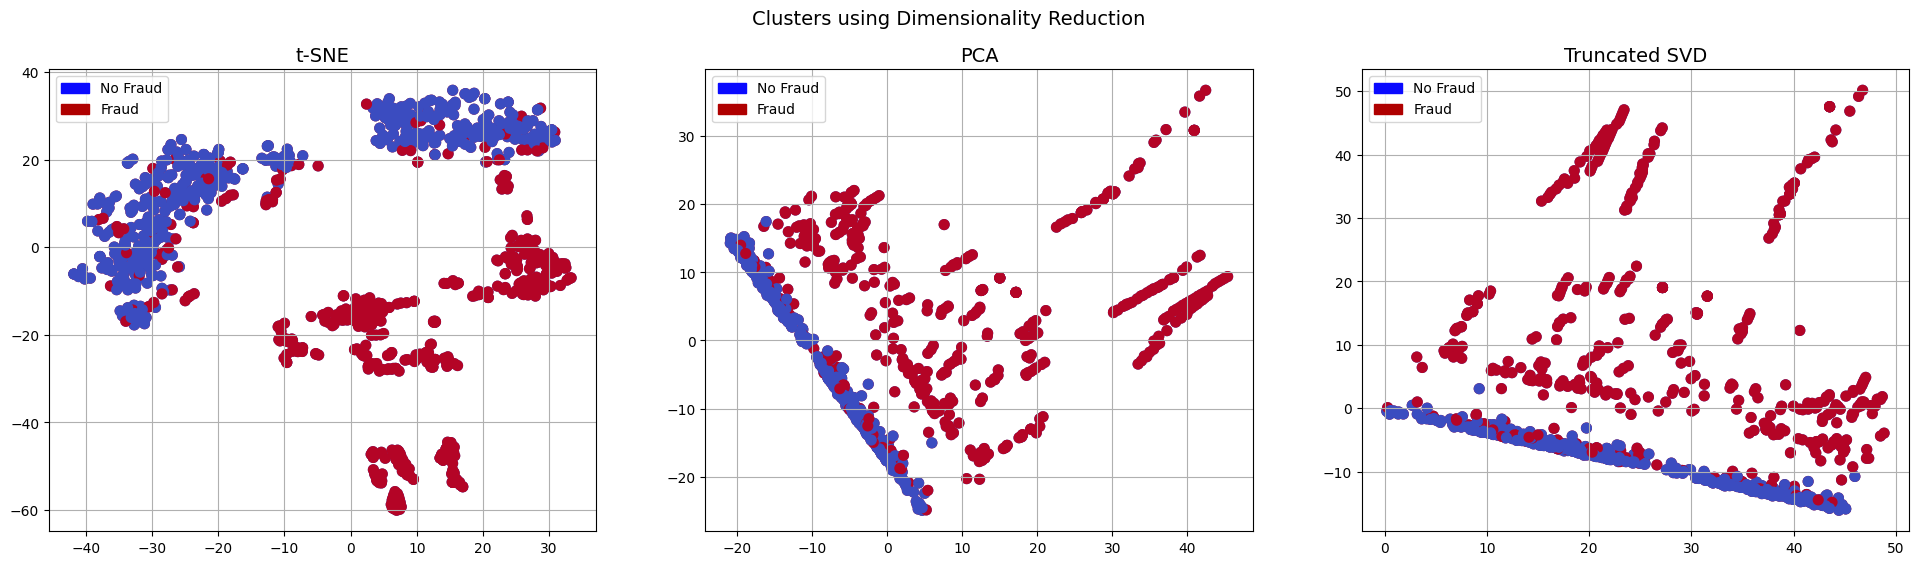

In [87]:
f, (ax1, ax2, ax3) = plt.subplots(1, 3, figsize=(24,6))
# labels = ['No Fraud', 'Fraud']
f.suptitle('Clusters using Dimensionality Reduction', fontsize=14)


blue_patch = mpatches.Patch(color='#0A0AFF', label='No Fraud')
red_patch = mpatches.Patch(color='#AF0000', label='Fraud')


# t-SNE scatter plot
ax1.scatter(X_reduced_tsne[:,0], X_reduced_tsne[:,1], c=(y == 0), cmap='coolwarm', label='No Fraud', linewidths=2)
ax1.scatter(X_reduced_tsne[:,0], X_reduced_tsne[:,1], c=(y == 1), cmap='coolwarm', label='Fraud', linewidths=2)
ax1.set_title('t-SNE', fontsize=14)

ax1.grid(True)

ax1.legend(handles=[blue_patch, red_patch])


# PCA scatter plot
ax2.scatter(X_reduced_pca[:,0], X_reduced_pca[:,1], c=(y == 0), cmap='coolwarm', label='No Fraud', linewidths=2)
ax2.scatter(X_reduced_pca[:,0], X_reduced_pca[:,1], c=(y == 1), cmap='coolwarm', label='Fraud', linewidths=2)
ax2.set_title('PCA', fontsize=14)

ax2.grid(True)

ax2.legend(handles=[blue_patch, red_patch])

# TruncatedSVD scatter plot
ax3.scatter(X_reduced_svd[:,0], X_reduced_svd[:,1], c=(y == 0), cmap='coolwarm', label='No Fraud', linewidths=2)
ax3.scatter(X_reduced_svd[:,0], X_reduced_svd[:,1], c=(y == 1), cmap='coolwarm', label='Fraud', linewidths=2)
ax3.set_title('Truncated SVD', fontsize=14)

ax3.grid(True)

ax3.legend(handles=[blue_patch, red_patch])

plt.show()

In [88]:
# Undersampling before cross validating (prone to overfit)
X_under = new_df.drop('Class', axis=1)
y_under = new_df['Class']

In [89]:
# Our data is already scaled we should split our training and test sets
from sklearn.model_selection import train_test_split

# This is explicitly used for undersampling.
X_train, X_test, y_train, y_test = train_test_split(X_under, y_under, test_size=0.2, random_state=42)

In [90]:
# Turn the values into an array for feeding the classification algorithms.
X_train = X_train.values
X_test = X_test.values
y_train = y_train.values
y_test = y_test.values

In [91]:
# Let's implement simple classifiers

classifiers = {
    "LogisiticRegression": LogisticRegression(),
    "KNearest": KNeighborsClassifier(),
    "Support Vector Classifier": SVC(),
    "DecisionTreeClassifier": DecisionTreeClassifier(),
    "NaiveBaiyes":GaussianNB(),
    "RandomForestClassifier":RandomForestClassifier(n_estimators=50,max_depth=12,random_state=13)
}

In [92]:
from sklearn.model_selection import cross_val_score


for key, classifier in classifiers.items():
    classifier.fit(X_train, y_train)
    training_score = cross_val_score(classifier, X_train, y_train, cv=5)
    print("Classifiers: ", classifier.__class__.__name__, "Has a training score of", round(training_score.mean(), 2) * 100, "% accuracy score")

Classifiers:  LogisticRegression Has a training score of 94.0 % accuracy score
Classifiers:  KNeighborsClassifier Has a training score of 92.0 % accuracy score
Classifiers:  SVC Has a training score of 93.0 % accuracy score
Classifiers:  DecisionTreeClassifier Has a training score of 90.0 % accuracy score
Classifiers:  GaussianNB Has a training score of 92.0 % accuracy score
Classifiers:  RandomForestClassifier Has a training score of 94.0 % accuracy score


In [93]:
# DecisionTree Classifier
tree_params = {"criterion": ["gini", "entropy"], "max_depth": list(range(2,4,1)), 
              "min_samples_leaf": list(range(5,7,1))}
grid_tree = GridSearchCV(DecisionTreeClassifier(), tree_params)
grid_tree.fit(X_train, y_train)
tree_clf = grid_tree.best_estimator_

In [94]:
nb=GaussianNB()

In [95]:
nb.fit(X_train, y_train)

GaussianNB()

In [96]:
from sklearn.model_selection import cross_val_score
score = cross_val_score(nb, X_train, y_train, cv=kf, scoring='recall')
print("Cross Validation Recall scores are: {}".format(score))
print("Average Cross Validation Recall score: {}".format(score.mean()))


Cross Validation Recall scores are: [0.8961039  0.88311688 0.81578947 0.88157895 0.84210526]
Average Cross Validation Recall score: 0.8637388926862611


In [97]:
tree_score = cross_val_score(tree_clf, X_train, y_train, cv=5)
print('DecisionTree Classifier Cross Validation Score', round(tree_score.mean() * 100, 2).astype(str) + '%')

DecisionTree Classifier Cross Validation Score 93.01%


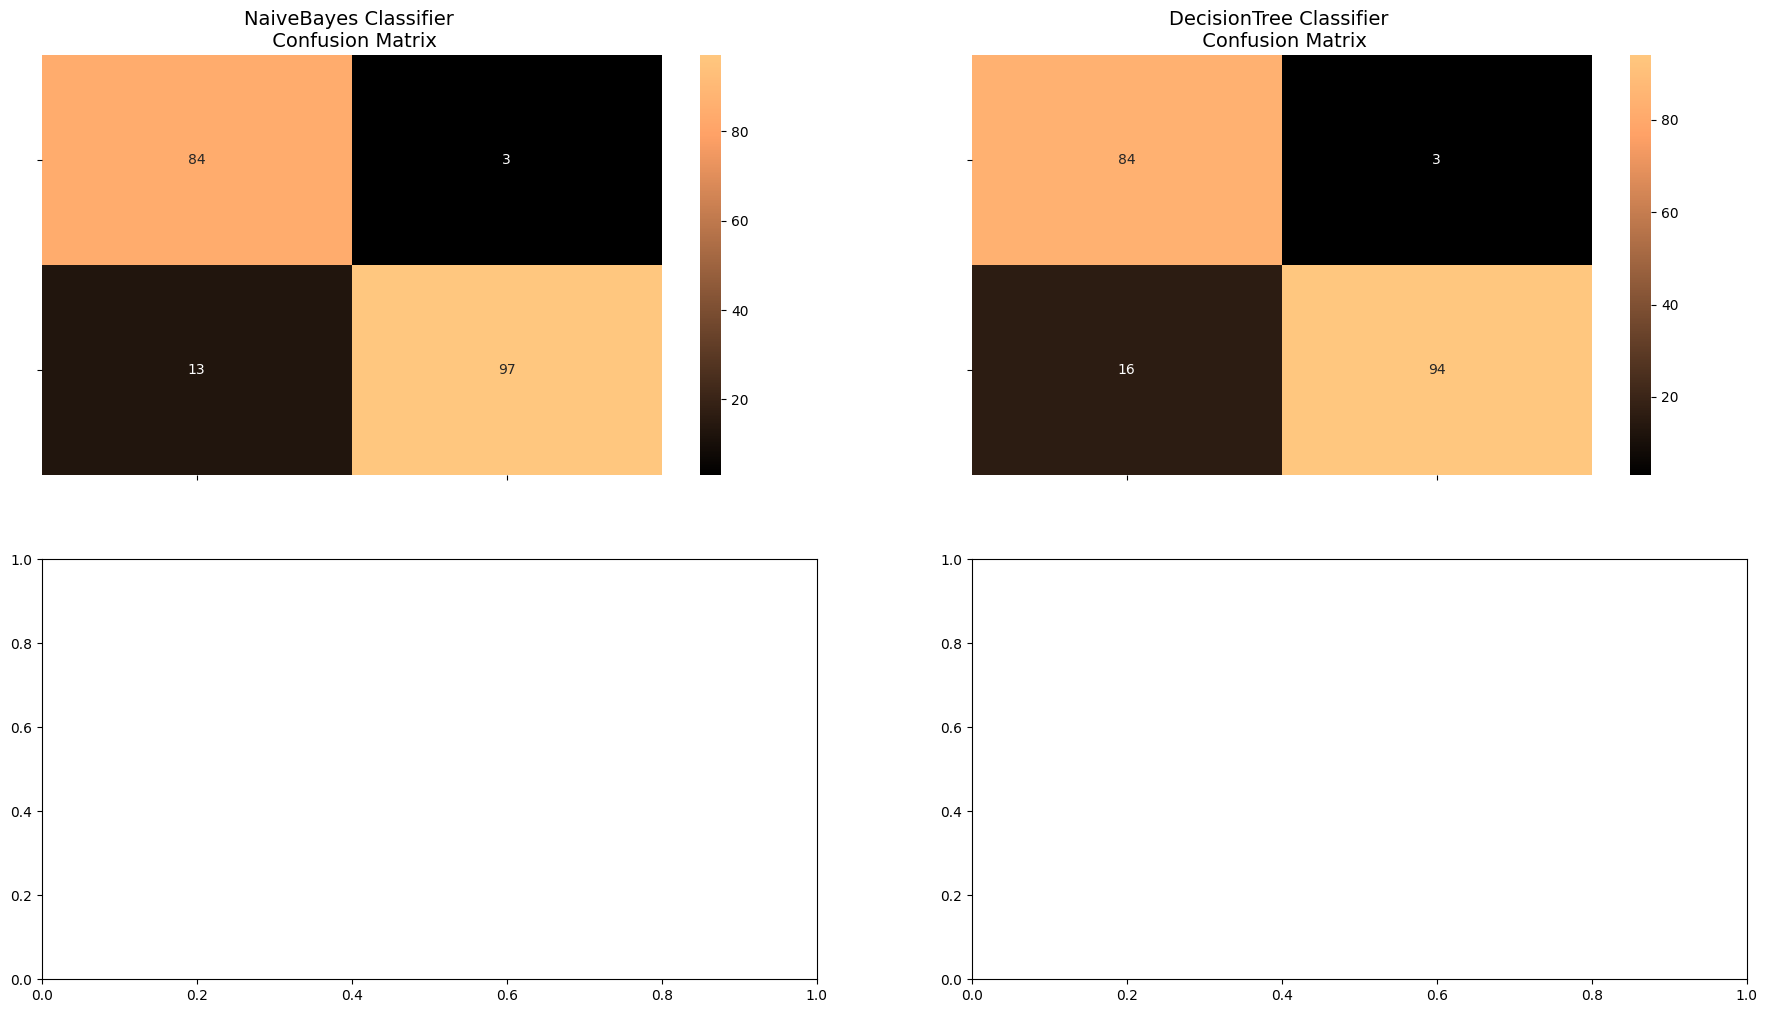

In [98]:
y_pred_nb = nb.predict(X_test)
y_pred_tree = tree_clf.predict(X_test)


naive_cf = confusion_matrix(y_test, y_pred_nb)
tree_cf = confusion_matrix(y_test, y_pred_tree)

fig, ax = plt.subplots(2, 2,figsize=(22,12))


sns.heatmap(naive_cf, ax=ax[0][0], annot=True, cmap=plt.cm.copper)
ax[0][0].set_title("NaiveBayes Classifier \n Confusion Matrix", fontsize=14)
ax[0][0].set_xticklabels(['', ''], fontsize=14, rotation=90)
ax[0][0].set_yticklabels(['', ''], fontsize=14, rotation=360)

sns.heatmap(tree_cf, ax=ax[0][1], annot=True, cmap=plt.cm.copper)
ax[0][1].set_title("DecisionTree Classifier \n Confusion Matrix", fontsize=14)
ax[0][1].set_xticklabels(['', ''], fontsize=14, rotation=90)
ax[0][1].set_yticklabels(['', ''], fontsize=14, rotation=360)


plt.show()

In [99]:
from sklearn.metrics import classification_report


print('Naive Bayes Classifier:')
print(classification_report(y_test, y_pred_nb))

print('Decision Tree Classifier:')
print(classification_report(y_test, y_pred_tree))

Naive Bayes Classifier:
              precision    recall  f1-score   support

           0       0.87      0.97      0.91        87
           1       0.97      0.88      0.92       110

    accuracy                           0.92       197
   macro avg       0.92      0.92      0.92       197
weighted avg       0.92      0.92      0.92       197

Decision Tree Classifier:
              precision    recall  f1-score   support

           0       0.84      0.97      0.90        87
           1       0.97      0.85      0.91       110

    accuracy                           0.90       197
   macro avg       0.90      0.91      0.90       197
weighted avg       0.91      0.90      0.90       197

